# Part II - (The Effects of EmploymentStatus,ProsperScore and BorrowerState on LoanStatus)
## by (Lyno Kipkogei Tolo)

## Investigation Overview

In this part of the investigation,i will focus on finding out the features that are responsible for the Defaulted,Completed and Chargedoff Status of Loans. My primary focus will be EmploymentStatus,ProsperScore and BorrowerState. 

## Dataset Overview

This ProsperLoan dataset contains 113,937 loans and their attributes incluning LoanStatus,BorrowerState,borrower rate (or interest rate), employment status, recommendations count, borrower income, and many others.
However, i created a dataframe from a subset of LoanStatus to only include Default,Completed and Chargedoff. I also created a dummy column, CreditSCoreMean and sliced the States to the top 10 to enable my investigations

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosper_loan = pd.read_csv('prosperLoanData.csv')

In [3]:
#create a dataframe from our main variable of interest, LoanStatus for Defaulted,Completed,Chargedoff
prosper_loan_df = prosper_loan.loc[prosper_loan['LoanStatus'].isin(['Defaulted','Completed','Chargedoff'])]

In [4]:
#lets create a column CreditScoreMean
prosper_loan_df['CreditScoreMean'] = prosper_loan_df[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].mean(axis=1)

In [5]:
#lets drop the null values in ProsperScore
prosper_loan_df['ProsperScore'].dropna(inplace=True)

In [6]:
#lets replace the null values in CreditScoreMean column with the mean
prosper_loan_df['CreditScoreMean'].fillna(int(prosper_loan_df['CreditScoreMean'].mean()), inplace=True)

In [7]:
#convert Occupation to Categorical variables
var_dict = {'Occupation': ['Accountant/CPA', 'Administrative Assistant', 'Analyst', 'Architect', 
        'Attorney', 'Biologist', 'Bus Driver', 'Car Dealer', 'Chemist', 'Civil Service', 
        'Clergy', 'Clerical', 'Computer Programmer', 'Construction', 'Dentist', 'Doctor',
         'Engineer - Mechanical', 'Engineer - Electrical', 'Engineer-Mechanical', 'Executive', 
         'Fireman', 'Filght Attendant', 'Food Service', 'Food Service Management', 'Homemaker',
         'Investor', 'Judge', 'Laborer', 'Landscaping', 'Medical Technician', 'Military Enlisted',
        'Military Officer', 'Nurse (LPN)', 'Nurse (RN)', "Nurse's Aid", 'Other', 'Pharmacist',
         'Pilot - Private/Commercial', 'Police Officer/Correction Officer', 'Postal Service', 
         'Principal', 'Professional', 'Professor', 'Psychologist', 'Realtor', 'Religious', 
          'Retail Management', 'Sales - Commission', 'Sales - Retail', 'Scientist', 'Skilled Labor',
         ' Social Worker', 'Student - College Freshman', 'Student - College Graduate Student', 
         'Student - College Junior', 'Student - College Senior', 'Student - College Sophomore', 
        'Student - Community College', 'Student - Technical School', 'Teacher', "Teacher's Aide",
        'Tradesman - Carpenter', 'Tradesman - Electrician', 'Tradesman - Mechanic', 'Tradesman - Plumber', 
        'Truck Driver', 'Waiter/Waitress']}
        
for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = var_dict[var])
    prosper_loan[var] = prosper_loan[var].astype(ordered_var)
       


## Distribution of LoanStatus

>  It is clear from the visual that majority of loans were completed with few loans defaulted.

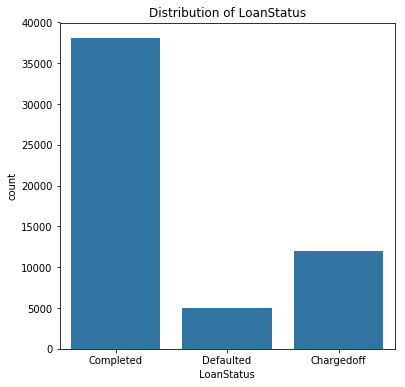

In [8]:
plt.figure(figsize = (6,6))
base_color = sb.color_palette()[0]
sb.countplot(data=prosper_loan_df, x='LoanStatus', color=base_color)
plt.title('Distribution of LoanStatus');

## Distribution of Employment Status

> The barplot clearly indicates that most of the borrowers are employed with majority employed full time

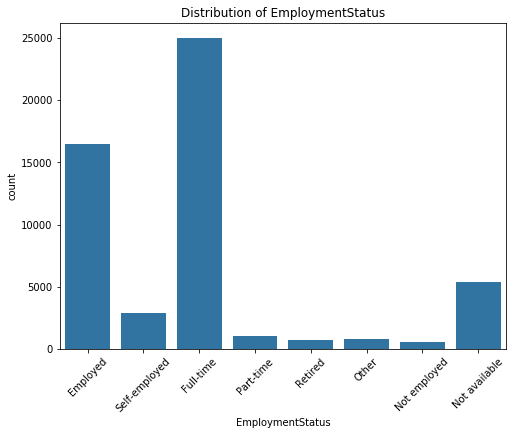

In [9]:
emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
prosper_loan_df['EmploymentStatus'] = prosper_loan_df['EmploymentStatus'].astype(ordered_var)

plt.figure(figsize = (8,6))
sb.countplot(data=prosper_loan_df, x='EmploymentStatus', color=base_color)
plt.xticks(rotation=45)
plt.title('Distribution of EmploymentStatus');

## Distribution of ProsperScore

The suitable plot used here is a histogram since the ProsperScore variable is numeric. Most of the borrowers have a ProsperScore of between 6 and 8, with 8 being the top rating

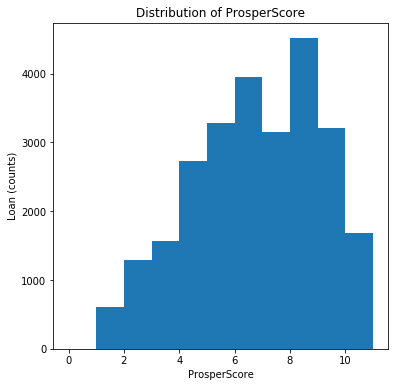

In [10]:
prosper_loan_df['ProsperScore'].dropna(inplace=True)
plt.figure(figsize = (6,6))
bins = np.arange(0,prosper_loan_df['ProsperScore'].max()+1 , 1)
base_color = sb.color_palette()[0]
plt.hist(data=prosper_loan_df, x='ProsperScore', color=base_color, bins=bins)
plt.xlabel('ProsperScore')
plt.ylabel('Loan (counts)')
plt.title('Distribution of ProsperScore');

## Distribution of BorrowerState

Most of the borrowers are from the states of California, Florida, Illnois and Texas as is evident from the plot

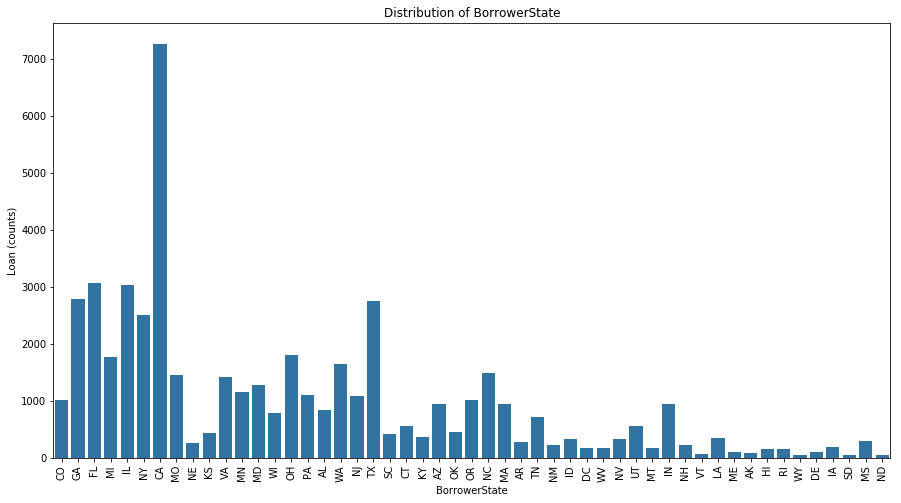

In [14]:
plt.figure(figsize = (15,8))
sb.countplot(data=prosper_loan_df, x='BorrowerState', color=base_color)
plt.xticks(rotation=90)
plt.title('Distribution of BorrowerState')
plt.ylabel('Loan (counts)');

## Relationship between LoanStatus and EmploymentStatus

The barchart shows clearly that the Completed loans were the highest and this was attributed to those with a full time employment followed by those that are employed. Most of the loans were discharged off than defaulted except for the category where employment details are not available.

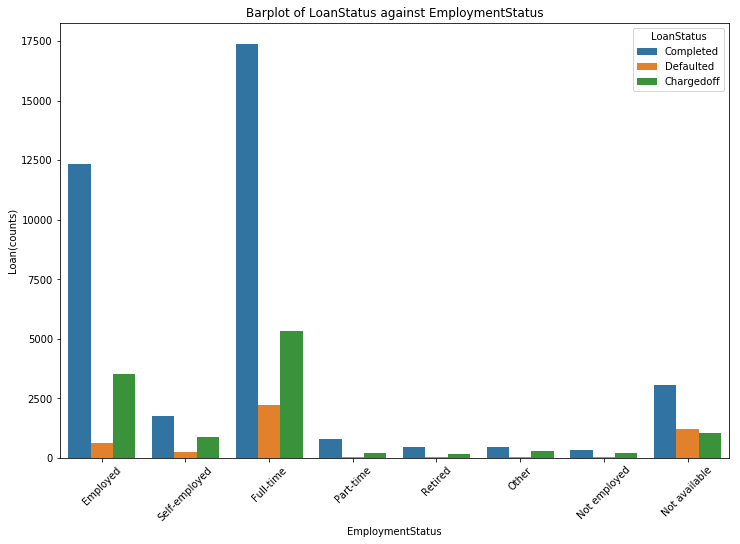

In [17]:
plt.figure(figsize = (12,8))

sb.countplot(data = prosper_loan_df, x = 'EmploymentStatus', hue = 'LoanStatus')
plt.xticks(rotation=45)
plt.title('Barplot of LoanStatus against EmploymentStatus')
plt.ylabel('Loan(counts)');

## ProsperScore relationship with LoanStatus
It is evident from the plot that the Completed loans have the highest median which drops uniformly.The high ProsperScore ratings are associated with completed loans. This implies that the ProsperScores are correct in predicting the LoanStatus with high scores correspodning to loans Completed. However, borrowers with a ProsperScore below those who Defaulted had their loans dischragedof

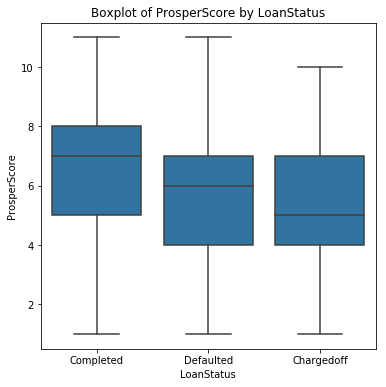

In [18]:
plt.figure(figsize = (6,6))
sb.boxplot(data=prosper_loan_df, x='LoanStatus', y='ProsperScore', color=base_color)
plt.title('Boxplot of ProsperScore by LoanStatus');

## Relationship between LoanStatus, EmploymentStatus and ProsperScore

It is evident from the plot that the borrowers who Completed their loans have a high ProsperScore regardless of their EmploymentStatus. The borrowers with who Defaulted seem to have higher ProsperScores than those with Chragedoff loans which is quite surprising.

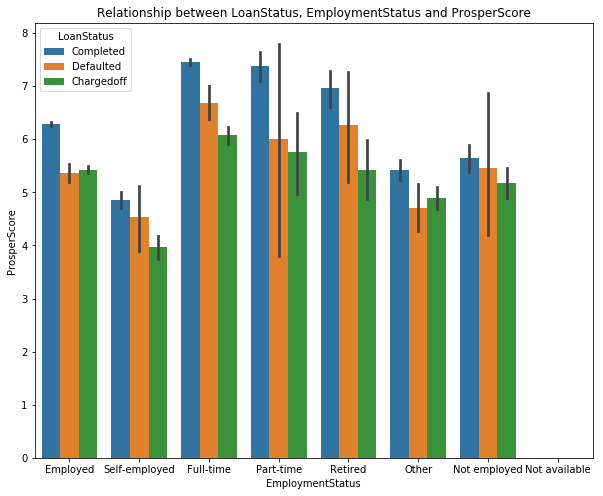

In [31]:
plt.figure(figsize = (10,8))
sb.barplot(data=prosper_loan_df, x='EmploymentStatus', y='ProsperScore', hue='LoanStatus')
plt.title('Relationship between LoanStatus, EmploymentStatus and ProsperScore');

## Relationship between LoanStatus, BorrowerState and ProsperScore

The above plot depicts that most of the loans Completed have a high ProsperScore and top states being IL,NY and CA.GA having a high number of borrowers has the highest Defaulters,followed by WA but with good ProsperScore. Most loans discharged belong to borrowers of GA,FL,IL and NY.

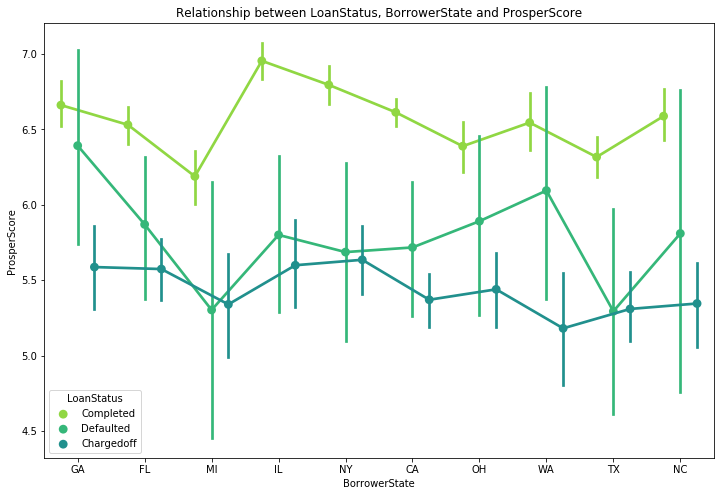

In [24]:
#create a dataframe from our main dataframe to showcase the top 10 states
top10_states = prosper_loan_df.loc[prosper_loan_df['BorrowerState'].isin(['CA', 'FL', 'IL', 'GA', 'TX', 'NY', 'OH', 'MI', 'WA', 'NC'])]
plt.figure(figsize = (12,8))
sb.pointplot(data=top10_states, x='BorrowerState', y='ProsperScore', hue='LoanStatus', palette=sb.color_palette('viridis_r', 5), dodge = 0.5)
plt.title('Relationship between LoanStatus, BorrowerState and ProsperScore');